# Import FosforML library 

In [2]:
!pip install fosforml==1.0.1

     |████████████████████████████████| 51kB 4.3MB/s eta 0:00:011
     |████████████████████████████████| 737kB 9.4MB/s eta 0:00:01
     |████████████████████████████████| 61kB 85.2MB/s eta 0:00:01
     |████████████████████████████████| 71kB 82.4MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 84.1MB/s eta 0:00:01
     |████████████████████████████████| 122kB 81.7MB/s eta 0:00:01
     |████████████████████████████████| 51kB 66.9MB/s eta 0:00:01
     |████████████████████████████████| 71kB 81.7MB/s eta 0:00:01
     |████████████████████████████████| 9.8MB 79.9MB/s eta 0:00:01
     |████████████████████████████████| 71kB 69.2MB/s eta 0:00:01
     |████████████████████████████████| 143kB 86.0MB/s eta 0:00:01
     |████████████████████████████████| 174kB 88.8MB/s eta 0:00:01
     |████████████████████████████████| 307kB 82.0MB/s eta 0:00:01
     |████████████████████████████████| 34.5MB 79.0MB/s eta 0:00:01
Failed to build shutils
ERROR: snowflake-snowpark-python 1.0.0 has 

In [14]:
!pip install seaborn==0.10.0

     |████████████████████████████████| 225kB 1.9MB/s eta 0:00:01
     |████████████████████████████████| 34.5MB 13.7MB/s eta 0:00:01
     |████████████████████████████████| 12.4MB 29.5MB/s eta 0:00:01
     |████████████████████████████████| 9.2MB 24.4MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 32.6MB/s eta 0:00:01
     |████████████████████████████████| 512kB 40.4MB/s eta 0:00:01
     |████████████████████████████████| 235kB 40.4MB/s eta 0:00:01
     |████████████████████████████████| 348kB 39.4MB/s eta 0:00:01
     |████████████████████████████████| 4.7MB 38.7MB/s eta 0:00:01
     |████████████████████████████████| 307kB 53.5MB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 24.7MB/s eta 0:00:01
     |████████████████████████████████| 1.2MB 41.7MB/s eta 0:00:01
     |████████████████████████████████| 61kB 56.5MB/s eta 0:00:01
     |████████████████████████████████| 112kB 42.9MB/s eta 0:00:01
ERROR: fosforml 1.0.0 has requirement urllib3==1.26.15, but y

You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from fosforml import *

ImportError: cannot import name 'appengine' from 'urllib3.contrib' (/packages/Python-3.8-Snowpark/c98ef628-63be-4a89-bd1c-9d3426298d93/3.8/urllib3/contrib/__init__.py)

In [15]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [7]:
#estblishing connection between notebook and snowflake
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt



import time
from snowflake.snowpark.session import Session
import configparser

import warnings
warnings.filterwarnings("ignore")

config = configparser.ConfigParser()
config.read("snowflake_connection.ini")

connection_parameters = {
    "user": f'{config["Snowflake"]["user"]}',
    "password": f'{config["Snowflake"]["password"]}',
    "account": f'{config["Snowflake"]["account"]}',
    "WAREHOUSE": f'{config["Snowflake"]["WAREHOUSE"]}',
    "DATABASE": f'{config["Snowflake"]["DATABASE"]}',
    "SCHEMA": f'{config["Snowflake"]["SCHEMA"]}'
}

def snowflake_connector(conn):
    try:
        session = Session.builder.configs(conn).create()
        print("connection successful!")
    except:
        raise ValueError("error while connecting with db")
    return session

session = snowflake_connector(connection_parameters)


connection successful!


In [8]:
sales_bangalore_2022 = session.table("SOL_ASSORTMENT_PLANNING_COMB").to_pandas()

In [9]:
sales_bangalore_2022.head()

,TRANSACTION_DATE,MNTH_CODE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,DISTRIBUTOR_CODE,PRODUCT_CODE,OUTLET_CODE,CITY,STATE,COUNTY,STREET,CATEGORY,VARIANT,BRAND
0,2023-07-01,202203,460.91,3,0.002700,460.909091,DB0706,PRD0041,OL81278,Montclair,New Jersey,Dolphin,Str1,Soap,Beauty Soap,Charcoal
1,2023-07-01,202203,277.14,32,0.000832,285.714286,DB0706,PRD0069,OL206924,Breckenridge,Colorado,Dolphin,Str2,Perfume and Deodrants,Female Deodrant,Arctic blue
2,2023-07-01,202203,636.36,4,0.001200,636.363636,DB0706,PRD0078,OL81756,Tucson,Arizona,City Center,Str1,Lotion,Head Lotion,Saffron
3,2023-07-01,202203,138.57,16,0.000400,142.857143,DB0209,PRD0147,OL238948,San Pedro,California,Orange,Str5,Kids Care,Baby Cream,Mint
4,2023-07-01,202203,142.86,16,0.000416,142.857143,DB0110,PRD0069,OL81622,Orange,Connecticut,Silver,Str5,Perfume and Deodrants,Female Deodrant,Arctic blue


NameError: name 'sns' is not defined

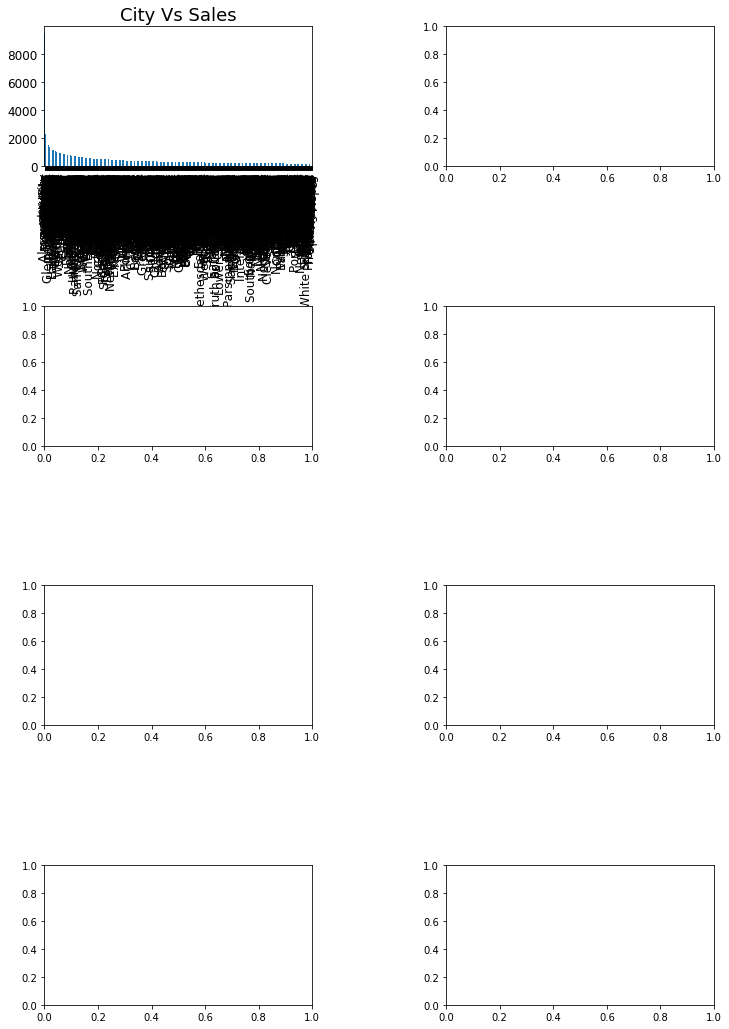

In [11]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
sales_bangalore_2022.groupby('CITY')['SALES_PTR_VALUE'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("City Vs Sales", fontsize=18)
#data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
#axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
#data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
#axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
#data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
#axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
#data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
#axarr[2][0].set_title("Brand Vs Price", fontsize=18)
#data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
#axarr[2][1].set_title("Model Vs Price", fontsize=18)
#data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
#axarr[3][0].set_title("Seats Vs Price", fontsize=18)
#data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
#axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
#sns.despine()